### the first and foremost step for doing any ML project should be to first understand what is the data and what we have to find(target column)

In [1]:
# first you should start with target column and understand everything about it.

# in our case it's SalePrice so we have to understand everything about it.

# for example in our data we have to predict the price of an apartment or zameen ka price pta lagana hai

# to predict the price there are several factors which affects the price

# to my understanding kya kya hai vo factors=== location, yearsold, totalrooms, view(again location)[neighbors location], aur bhi pta nhi kya kya

In [2]:
import pandas as pd
import numpy as np

In [3]:
X_tr = pd.read_csv('house-prices-advanced-regression-techniques/housing_prices_advanced_train.csv')

X_test = pd.read_csv('house-prices-advanced-regression-techniques/housing_prices_advanced_test.csv')

In [4]:
y_te = pd.read_csv('house-prices-advanced-regression-techniques/sample_submission.csv')

In [5]:
# first we will see how the SalePrice columns looks like(here we will try to see statistical terms and then try to understand them

# second we will see the graph and we will check what is the distribution of that column

In [6]:
y_train = X_tr.iloc[:,-1]
y_train
# this is our target column

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [7]:
y_train.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

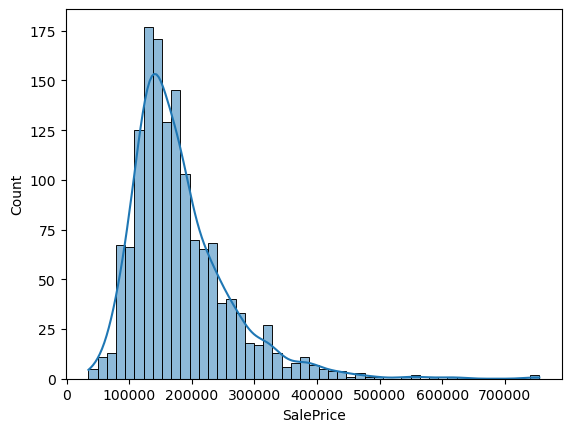

In [9]:
sns.histplot(y_train, kde=True);

In [10]:
# most of the value lies around the mean value and it's somewhat bell curve but the far end of the graph shows that there are 1 or 2 values which are priced
# really high and they can be an outlier

In [11]:
# it is right skewed
# there is a peak at one particular value
# it's not normal distribution

In [12]:
# Let's find out the skewedness and kurtosis of the graph
print("skewedness is:", y_train.skew())
print("kurtosis is:", y_train.kurt())

skewedness is: 1.8828757597682129
kurtosis is: 6.536281860064529


In [13]:
X_train = X_tr.drop(columns='SalePrice')

In [14]:
for i, feature in enumerate(list(X_train.select_dtypes(include=['int64', 'float64'])), 1):
    print(i, feature)

1 Id
2 MSSubClass
3 LotFrontage
4 LotArea
5 OverallQual
6 OverallCond
7 YearBuilt
8 YearRemodAdd
9 MasVnrArea
10 BsmtFinSF1
11 BsmtFinSF2
12 BsmtUnfSF
13 TotalBsmtSF
14 1stFlrSF
15 2ndFlrSF
16 LowQualFinSF
17 GrLivArea
18 BsmtFullBath
19 BsmtHalfBath
20 FullBath
21 HalfBath
22 BedroomAbvGr
23 KitchenAbvGr
24 TotRmsAbvGrd
25 Fireplaces
26 GarageYrBlt
27 GarageCars
28 GarageArea
29 WoodDeckSF
30 OpenPorchSF
31 EnclosedPorch
32 3SsnPorch
33 ScreenPorch
34 PoolArea
35 MiscVal
36 MoSold
37 YrSold


In [15]:
numeric = (list(X_train.select_dtypes(include=['int64', 'float64'])))
numeric

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [16]:
for i, feature in enumerate(list(numeric), 1):
    print(len(list(numeric)), 3, i, feature)

37 3 1 Id
37 3 2 MSSubClass
37 3 3 LotFrontage
37 3 4 LotArea
37 3 5 OverallQual
37 3 6 OverallCond
37 3 7 YearBuilt
37 3 8 YearRemodAdd
37 3 9 MasVnrArea
37 3 10 BsmtFinSF1
37 3 11 BsmtFinSF2
37 3 12 BsmtUnfSF
37 3 13 TotalBsmtSF
37 3 14 1stFlrSF
37 3 15 2ndFlrSF
37 3 16 LowQualFinSF
37 3 17 GrLivArea
37 3 18 BsmtFullBath
37 3 19 BsmtHalfBath
37 3 20 FullBath
37 3 21 HalfBath
37 3 22 BedroomAbvGr
37 3 23 KitchenAbvGr
37 3 24 TotRmsAbvGrd
37 3 25 Fireplaces
37 3 26 GarageYrBlt
37 3 27 GarageCars
37 3 28 GarageArea
37 3 29 WoodDeckSF
37 3 30 OpenPorchSF
37 3 31 EnclosedPorch
37 3 32 3SsnPorch
37 3 33 ScreenPorch
37 3 34 PoolArea
37 3 35 MiscVal
37 3 36 MoSold
37 3 37 YrSold


C:\Users\PK419HT\AppData\Local\Temp\ipykernel_4056\1473504698.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(len(list(numeric)), 3, i)
C:\Users\PK419HT\AppData\Local\Temp\ipykernel_4056\1473504698.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(len(list(numeric)), 3, i)
C:\Users\PK419HT\AppData\Local\Temp\ipykernel_4056\1473504698.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(len(list(numeric)), 3, i)


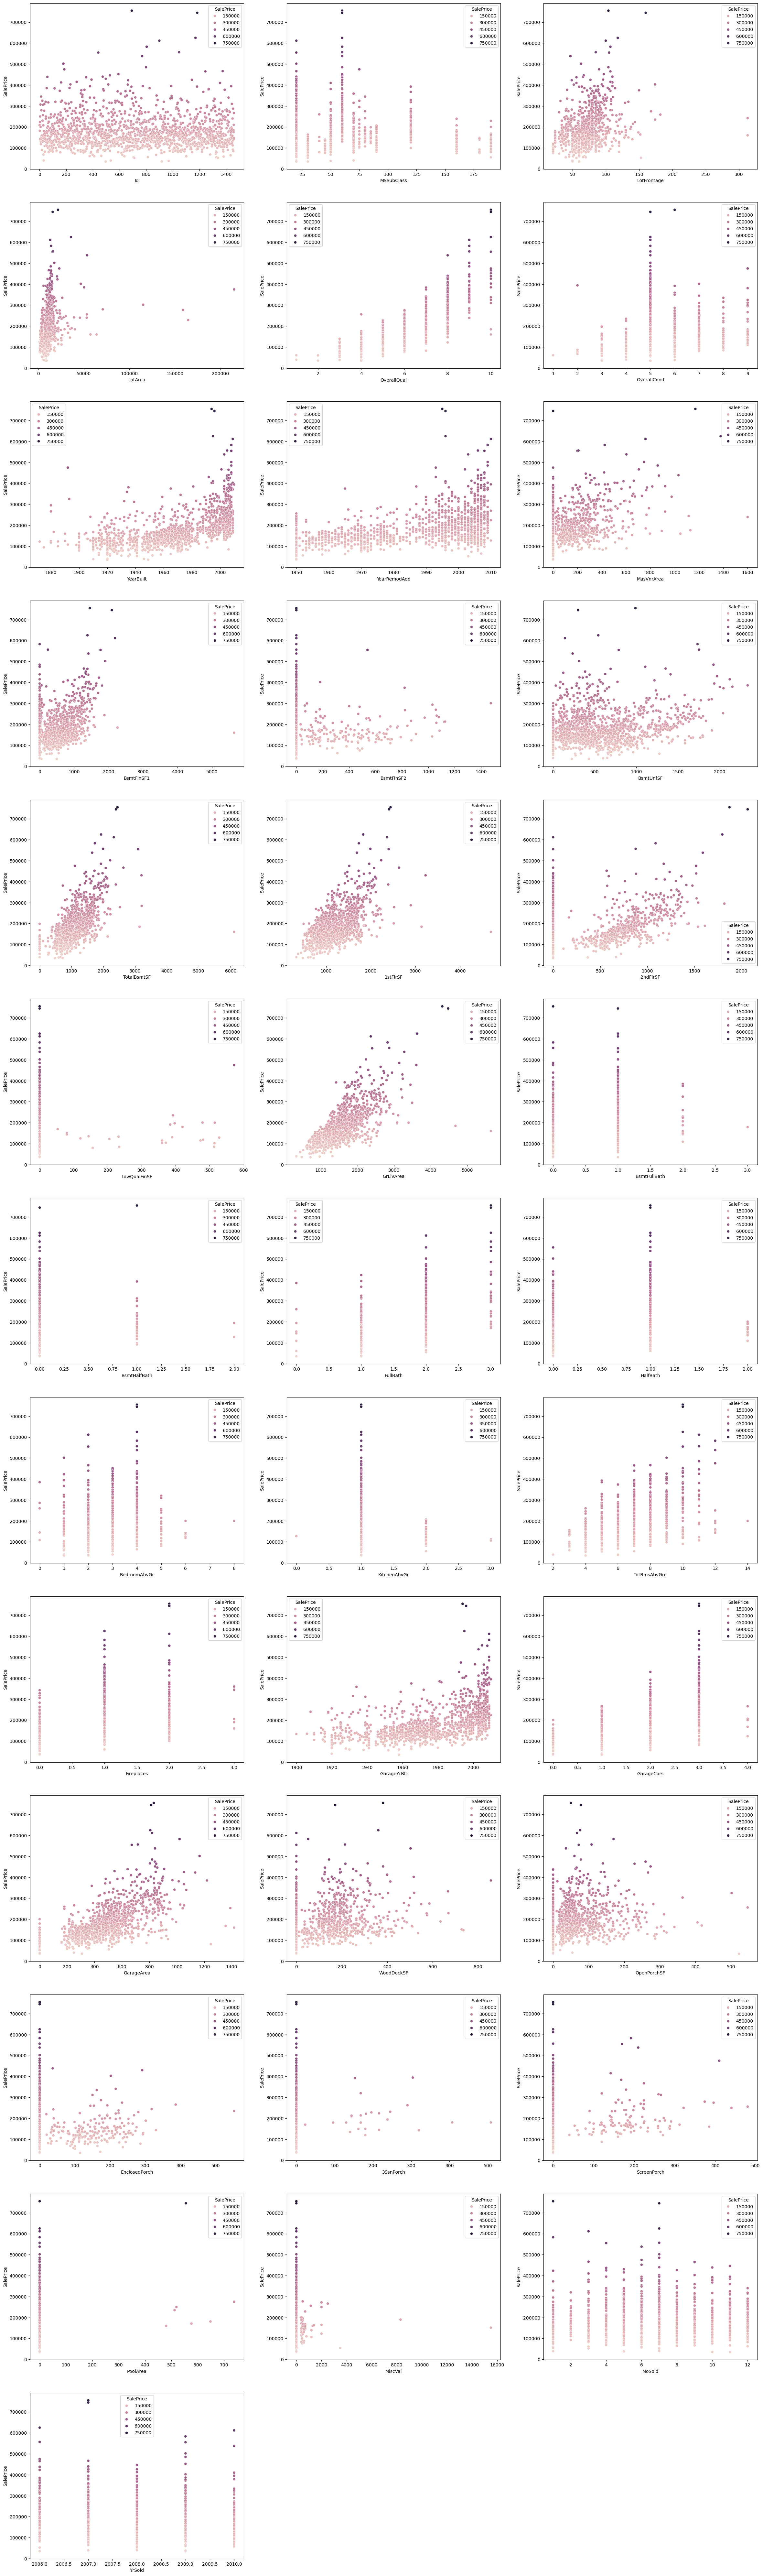

In [17]:
# numerical columns
fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(12, 120))
plt.subplots_adjust(right=2)
plt.subplots_adjust(top=2)
sns.color_palette("husl", 8)
for i, feature in enumerate(list(numeric), 1):
    plt.subplot(len(list(numeric)), 3, i)
    sns.scatterplot(x=X_train[feature], y=y_train, hue=y_train)
plt.show();

In [18]:
# what do we understand from the above graph
# first thing is how the feature is changing wrt to SalePrice, does the realationship between the two is linear or there is no relation at all

# we can find the same thing using correlation as well but graph gives us a better idea.


#

In [19]:
X_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal


In [20]:
## Now let's do the same for categorical features as well

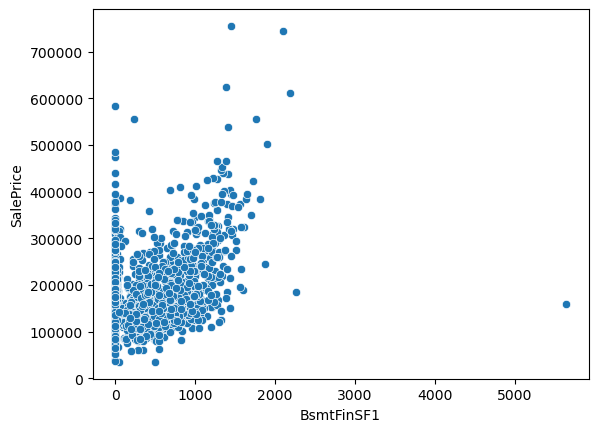

In [24]:
sns.scatterplot(x=X_train.BsmtFinSF1, y=y_train);

In [25]:
from scipy import stats

In [26]:
from scipy.stats import boxcox

In [31]:
boxcox(X_train.BsmtFinSF1+1)

(array([15.23536771, 16.75086279, 13.63289938, ..., 11.4398339 ,
         6.32547056, 15.97365457]),
 0.22872562524018467)

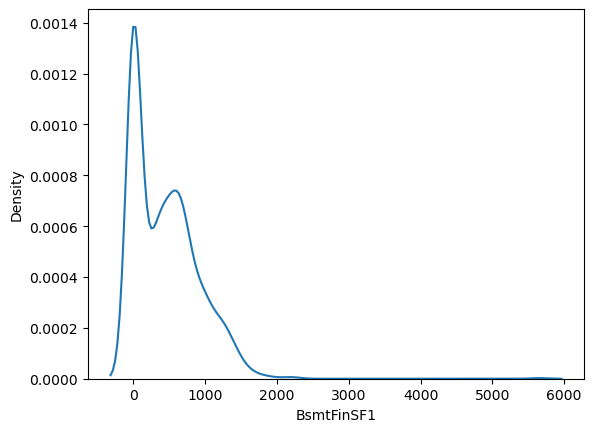

In [43]:
sns.kdeplot(X_train.BsmtFinSF1);

In [36]:
a, b = boxcox(X_train.BsmtFinSF1+1)

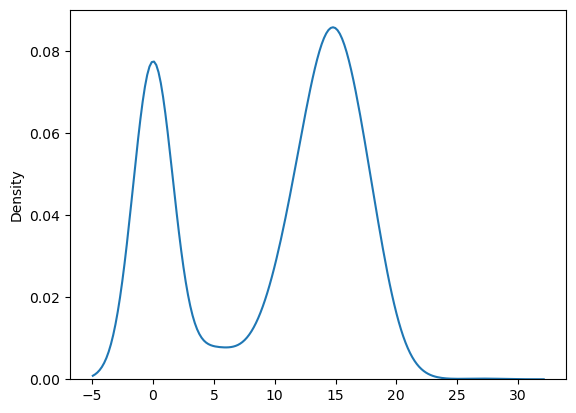

In [44]:
sns.kdeplot(a);

<Axes: xlabel='BsmtFinSF1', ylabel='Density'>

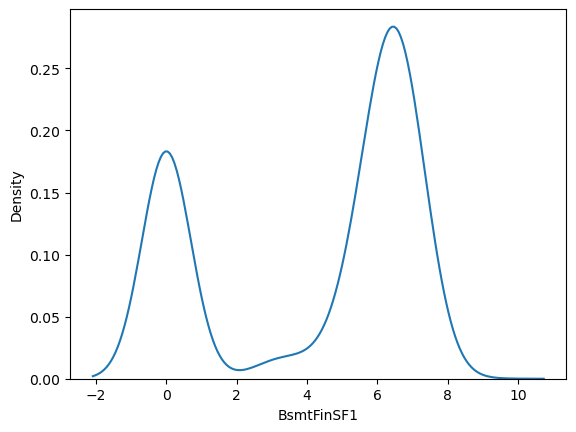

In [47]:
sns.kdeplot(np.log(X_train.BsmtFinSF1+1))

In [48]:
X_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal
